In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    yhat = (
        np
        .logical_not((model(XX)[:, 0] > 0.5).numpy())
        .reshape(xx.shape))
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title('Decision Region')
    plt.legend()

In [3]:
def accuracy(model, data_set):
    return (
        np.mean(
            data_set.y.view(-1).numpy() 
            == (model(data_set.x)[:, 0] > 0.5).numpy()))

In [4]:
class Net(nn.Module):    
    def __init__(self, D_in, H, D_out):
        # - D_in is the input size of the first layer (size of input
        #   layer)
        # - H is the outpout size of the first layer and the input size of
        #   the second layer (size of hidden layer)
        # - D_out is the output size of the second layer (size of output
        #   layer)
        super().__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        return x

In [5]:
def train(
        data_set, model, criterion, train_loader, optimizer, epochs=5):
    cost = []
    acc = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.item()
        acc.append(accuracy(model, data_set))
        cost.append(total)
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(cost, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)
    ax2.plot(acc, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()    
    plt.show()
    return cost

In [6]:
class XOR_Data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            # Create data centered around (0, 0) of class 0
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])
            # Create data centered around (0, 1) of class 1
            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
            # Create data centered around (1, 0) of class 1
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
            # Create data centered around (1, 1) of class 0
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])
            # Add some noise to the X values to make them different
            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
    
    def plot_stuff(self):
        plt.plot(
            self.x[self.y[:, 0] == 0, 0].numpy(), 
            self.x[self.y[:, 0] == 0, 1].numpy(), 
            'o', 
            label='y=0')
        plt.plot(
            self.x[self.y[:, 0] == 1, 0].numpy(),
            self.x[self.y[:, 0] == 1, 1].numpy(),
            'ro',
            label='y=1')
        plt.legend()

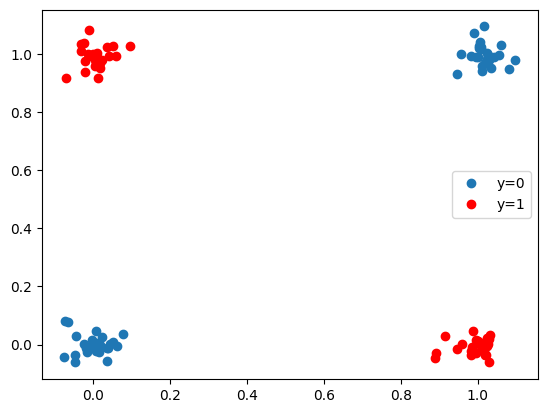

In [7]:
data_set = XOR_Data()
data_set.plot_stuff()

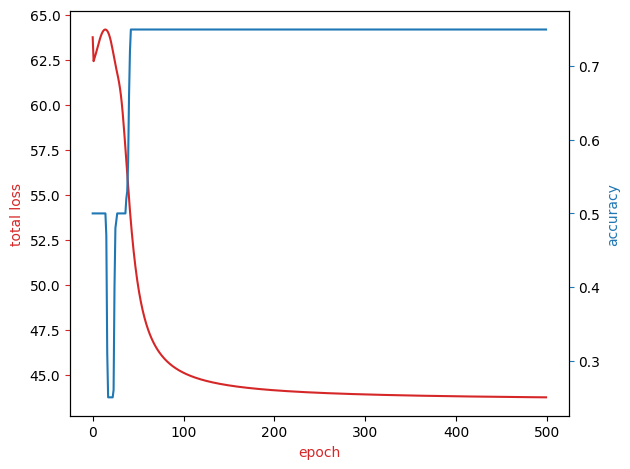

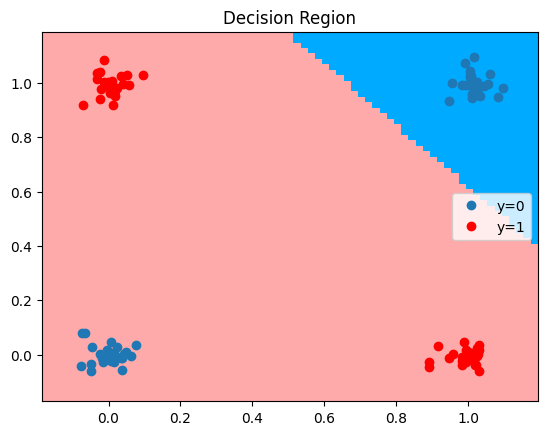

In [10]:
model = Net(2, 1, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
loss_1 = train(
    data_set, model, criterion, train_loader, optimizer, epochs=500)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

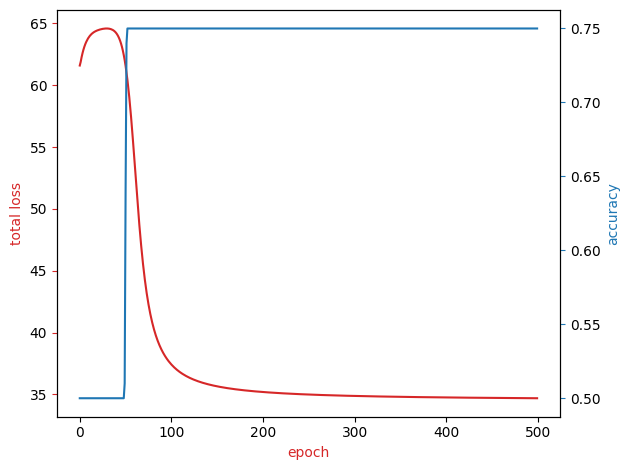

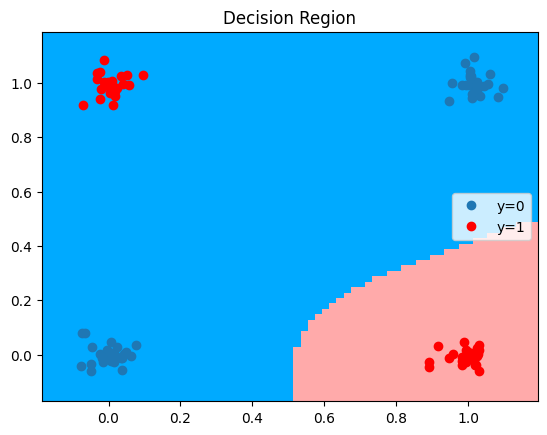

In [11]:
model = Net(2, 2, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
loss_1 = train(
    data_set, model, criterion, train_loader, optimizer, epochs=500)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

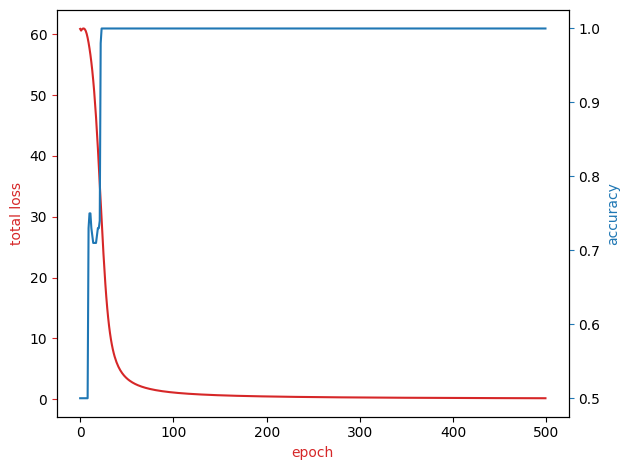

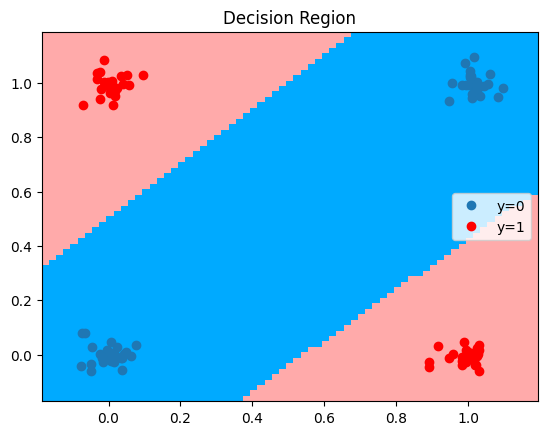

In [12]:
model = Net(2, 3, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
loss_1 = train(
    data_set, model, criterion, train_loader, optimizer, epochs=500)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

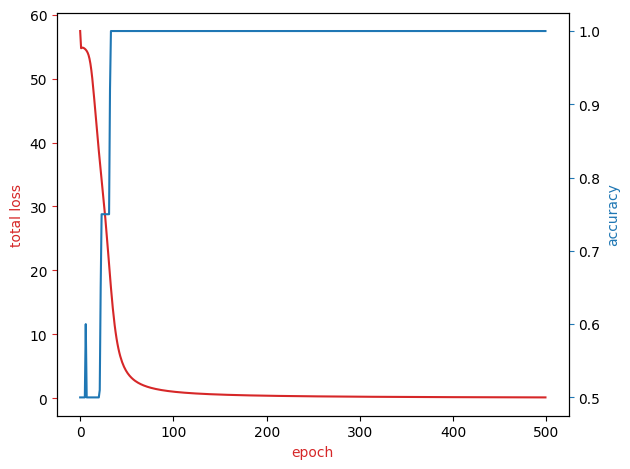

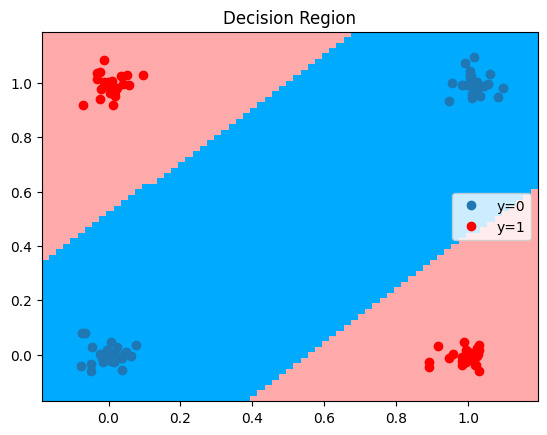

In [13]:
model = Net(2, 6, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
loss_1 = train(
    data_set, model, criterion, train_loader, optimizer, epochs=500)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)